In [55]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

In [56]:
type(data)

sklearn.utils.Bunch

dict에서 k, v에 접근하는 방법
- d['k'] = v
- v = d['k']

bunch는 key를 마치 attribute처럼 사용할 수 있도록해준다.
- b.k = v
- v = b.k

In [57]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [58]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
score = model.score(X_test, y_test)
print(f"결정계수 : {score}")

결정계수 : 0.6844267283527123


$$R^2 = 1- \cfrac {SSE}{SST} = \cfrac {SSR}{SST}$$
- $SST = \sum_i (y_i - \bar y)^2$ : Sum of Square Total (Variance)
- $SSE = \sum_i (y_i - \hat y_i)^2$ : Sum of Squared Error
- $SSR = \sum_i (\hat y_i - \bar y)^2$ : Sum of Squared Regression

In [61]:
yhat = model.predict(X_test)

In [62]:
import numpy as np
SST = np.square(y_test - y_test.mean()).sum()
SSE = np.square(y_test - yhat).sum()

R2 = 1 - SSE/SST
R2

0.6844267283527123

In [63]:
X_train.shape

(379, 13)

X의 shape이 (n, p)라면:

$$\begin{align}
SST &= SSE + SSR\\
\sum_i (y_i - \bar y)^2 &= \sum_i (y_i - \hat y_i + \hat y_i - \bar y)^2 \\
\sum_i (y_i - \bar y)^2 &= \sum_i (y_i - \hat y_i)^2 + \sum_i (\hat y_i - \bar y)^2\\
\text{DoF} : (n - 1) &= (n - p - 1) + (p )
\end{align}$$

- $\hat y = X \cdot W + b$
- MSE(Mean Squared Error) : $\cfrac {SSE}{n-p-1}$
- $y = \hat y + \epsilon$, 잔차 $\epsilon$의 분산값 $\sigma_e^2 = MSE$

$$\begin{align}
Loss(w) &= \sum_i \epsilon^2 = \sum_i (y - \hat y)^2 \\
&= (y - X \cdot w)^T \cdot (y - X \cdot w)\\
\cfrac {\partial Loss}{\partial w} &= 2 (X^T \cdot X) \cdot w - 2X^T \cdot y \\
w(t+1) &= w(t) - \text{lr} * \cfrac {\partial Loss}{\partial w} \Bigg|_{w =w(t)}
\end{align}$$

[Quiz] 보스턴 집값 데이터의 train data에 대한 $R^2$을 구하여라.

In [64]:
R2train = model.score(X_train, y_train)
R2train

0.7480872598623441

[Quiz] 임의의 noise 데이터를 추가할 때, 학습 데이터에서의 $R^2$은 어떻게 될까?

In [65]:
noise = np.random.randint(5, 30, (data.data.shape[0], 5))
newX = np.hstack([noise, data.data])

X_train, X_test, y_train, y_test = train_test_split(newX, data.target, random_state=42)
m = LinearRegression()
m.fit(X_train, y_train)

R2newTr = m.score(X_train, y_train)
R2newTe = m.score(X_test, y_test)
print("기본 데이터에서 학습 결정계수: %.3f, 테스트 결정계수: %.3f" %(R2train, score))
print("노이즈 데이터에서 학습 결정계수: %.3f, 테스트 결정계수: %.3f" %(R2newTr, R2newTe))

기본 데이터에서 학습 결정계수: 0.748, 테스트 결정계수: 0.684
노이즈 데이터에서 학습 결정계수: 0.750, 테스트 결정계수: 0.688


In [66]:
data.data.shape, noise.shape, newX.shape

((506, 13), (506, 5), (506, 18))

모든 머신러닝에서 일반적으로 변수의 수가 많아지면 변수로부터 불필요한 정보를 습득하려는 경향이 있다.

In [67]:
model.coef_

array([-1.283226e-01,  2.955178e-02,  4.885909e-02,  2.773503e+00,
       -1.623883e+01,  4.368755e+00, -9.248082e-03, -1.400867e+00,
        2.577612e-01, -9.956948e-03, -9.231229e-01,  1.318542e-02,
       -5.176395e-01])

In [68]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [69]:
m.coef_

array([ 2.056708e-03, -3.105704e-02,  3.140948e-02, -4.185871e-02,
       -4.522001e-03, -1.300394e-01,  2.981527e-02,  4.108202e-02,
        2.846291e+00, -1.649282e+01,  4.331558e+00, -8.130452e-03,
       -1.403363e+00,  2.600789e-01, -9.718016e-03, -9.358037e-01,
        1.322981e-02, -5.174730e-01])

[Quiz] 상관성있는 데이터에서의 결정계수와 회귀계수의 변화
- 보스턴 데이터에서 아래와 같이 2개의 변수를 추가하고
 - CN = 5\*CRIM - 5\*NOX, 
 - RA = 6\*RM - 3\*AGE + CRIM
- newX2라는 데이터를 생성하고, 
- 이 데이터로부터 학습과 테스트 데이터를 나누어서, 각각에 대한 $R^2$을 구하여라.
- 그리고 변화된 회귀계수를 비교해보자.

In [70]:
CRIM, NOX, RM, AGE = data.data[:,0], data.data[:,4], data.data[:,5], data.data[:,6]
CN, RA = 5*CRIM - 5*NOX, 6*RM - 3*AGE + CRIM

In [71]:
CN.shape

(506,)

In [72]:
newX2 = np.hstack([data.data, CN.reshape((-1,1)), RA.reshape((-1,1))])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(newX2, data.target, random_state=42)
m2 = LinearRegression()
m2.fit(X_train, y_train)

R2newTr = m2.score(X_train, y_train)
R2newTe = m2.score(X_test, y_test)
print("기본 데이터에서 학습 결정계수: %.3f, 테스트 결정계수: %.3f" %(R2train, score))
print("추가 데이터에서 학습 결정계수: %.3f, 테스트 결정계수: %.3f" %(R2newTr, R2newTe))

기본 데이터에서 학습 결정계수: 0.748, 테스트 결정계수: 0.684
추가 데이터에서 학습 결정계수: 0.748, 테스트 결정계수: 0.684


In [74]:
np.set_printoptions(precision=6)

In [75]:
model.coef_

array([-1.283226e-01,  2.955178e-02,  4.885909e-02,  2.773503e+00,
       -1.623883e+01,  4.368755e+00, -9.248082e-03, -1.400867e+00,
        2.577612e-01, -9.956948e-03, -9.231229e-01,  1.318542e-02,
       -5.176395e-01])

In [76]:
m2.coef_

array([-8.225284,  0.029552,  0.048859,  2.773503, -8.533498,  2.018974,
        1.165642, -1.400867,  0.257761, -0.009957, -0.923123,  0.013185,
       -0.51764 ,  1.541066,  0.39163 ])

우리가 수집한 데이터에서:
1. 임의의 노이즈가 주는 영향:
 - 학습 정확도는 올라가고, 테스트 정확도는 내려간다.
 - 모델의 정확도는 낮아진다.
2. 변수간의 상관성이 높은 경우, 변수간에 중복된 정보를 가지는 경우
 - 회귀계수의 단위가 커지게 된다.
 - 이유는 중복되지 않는 정보(작은량의 정보)를 빼내기 위해
 - 중복된 정보간의 큰 차이를 만들어서 작은 정보를 빼내려고 합니다.
 - 회귀계수의 스케일을 크게 만들어야 이런 작업을 할 수 있다.
 
각각의 변수 $X_1 = 0.1*A + \alpha$, $X_2 = -5*A + \beta$, $X_0 = A$의 정보량이다. 이때, A라는 정보는 3 변수에 서로 중복되어 있고, 이때 $\alpha$와 $\beta$라는 정보를 빼내려면, 다음과 같은 작업을 회귀모델에서는 수행하게 된다.
- $\alpha = X_1 - 0.1 * X_0$
- $\beta = X_2 + 5*X_0$

일반적으로 우리가 수집한 데이터는 위와 같이 노이즈도 가지고 있고, 중복된 정보도 가지게된다. 이를 통해 노이즈를 학습하려고 하면 할 수록, 회귀계수가 커지는 경향이 있다. 이를 다중공선성 문제라 한다.

## 다중공선성 문제
이러한 다중공선성 문제를 해결하기 위한 2가지 방법:
1. Ridge Regression : L2 규제화된 Linear Regression
2. Lasso Regression : L1 규제화된 LInear Regression

위 2가지 방법은 결국 작은 노이즈까지 학습하는 것을 방지하기 위해 w이 절대값이 커지는 것을 방지(규제)하는 방법을 사용합니다.

Ridge Regression:
$$Loss(w) = \sum_i (y - \hat y)^2 + \alpha ||w||^2$$
- 상대적으로 정확도가 높다

Lasso Regression:
$$Loss(w) = \sum_i (y - \hat y)^2 + \alpha |w|$$
- 더 적은 변수로 예측이 가능하다. (덜 중요한 변수는 포기)
- 예측시간이 빠르다. 더 좋은 장점을 갖다.
- 사업적용이 용이하다.

ElasticNet Regression:
$$Loss(w) = \sum_i (y - \hat y)^2 + \alpha (\beta|w| + (1-\beta)||w||^2)$$

w ~ 0.1
- Ridge 규제항: $|w|^2 \sim 0.01$ => 대부분 변수의 weight를 작은 값.
- Lasso 규제항: $|w| \sim 0.1$ => 설명력이 낮은 변수들의 weight ~ 0

---
규제항을 도입한 Ridge, Lasso의 공통적인 단점:
1. 기존 Loss인 MSE와 |W|에 대한 규제간의 weight factor인 $\alpha$를 튜닝해야 함.
 - 튜닝이란? 우리가 가지고 있는 데이터 X, y에 적합한 $\alpha$를 찾는 일
 - 여러개의 $\alpha$를 가지고 있는 모델을 학습해서, 테스트 데이터에서의 $R^2$가 더 좋은 것을 선택하는 일
2. p 개의 변수들을 모두 동일한 스케일로 맞추어야 한다. Scaling이라 한다.
 - 큰 단위로 측정한 작은값변수와 작은 단위로 측정한 큰값변수가 있을 때
 - 큰 단위로 측정한 작은값변수의 weight는 커져야 하는데, 규제항에 의해 그 중요도(weight)를 줄일 수 밖에 없고, 어떤 경우는 그 정보를 상실하게 된다.
 - 이는 Ridge, Lasso 모두 모든 회귀계수에 일률적인 규제강도 $\alpha$를 가지기 때문
 - 변수의 스케일 간의 차이에 의해 발생하는 이러한 문제를 해결하기 위해서는 학습전 모든 변수들을 같은 스케일을 가지도록 조정해줘야 한다.

## Ridge, Lasso 적용하기

In [77]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

In [78]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [79]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Ridge나 Lasso의 경우 회귀계수 즉, 입력변수에 대한 weight에 대한 규제를 갖기 때문에, 입력변수들에 대한 동등한 규제를 위해 입력변수들에 대한 scaling이 필요하다.

당뇨병 데이터의 경우, 아래와같이 모든 변수들이 정규화되어 있기 때문에 따라 scaling을 필요로하지 않는다.

In [80]:
data.data

array([[ 0.038076,  0.05068 ,  0.061696, ..., -0.002592,  0.019908,
        -0.017646],
       [-0.001882, -0.044642, -0.051474, ..., -0.039493, -0.06833 ,
        -0.092204],
       [ 0.085299,  0.05068 ,  0.044451, ..., -0.002592,  0.002864,
        -0.02593 ],
       ...,
       [ 0.041708,  0.05068 , -0.015906, ..., -0.01108 , -0.046879,
         0.015491],
       [-0.045472, -0.044642,  0.039062, ...,  0.02656 ,  0.044528,
        -0.02593 ],
       [-0.045472, -0.044642, -0.07303 , ..., -0.039493, -0.00422 ,
         0.003064]])

In [81]:
data.data.mean(axis=0)

array([-3.634285e-16,  1.308343e-16, -8.045349e-16,  1.281655e-16,
       -8.835316e-17,  1.327024e-16, -4.574646e-16,  3.777301e-16,
       -3.830854e-16, -3.412882e-16])

In [82]:
data.data.std(axis=0)

array([0.047565, 0.047565, 0.047565, 0.047565, 0.047565, 0.047565,
       0.047565, 0.047565, 0.047565, 0.047565])

In [83]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [84]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.4384009113704955

In [85]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.37914194389255096

In [86]:
elastic = ElasticNet(alpha=1.0, l1_ratio=.5)
elastic.fit(X_train, y_train)
elastic.score(X_test, y_test)

-0.0044383730131891674

- $R^2 = 1 - \cfrac {SSE}{SST}< 0$ : SSE가 SST보다 크다는 것을 의미
- y의 값을 y의 평균값으로 예측하는 dummy 모델보다 않좋다는 것을 말한다.

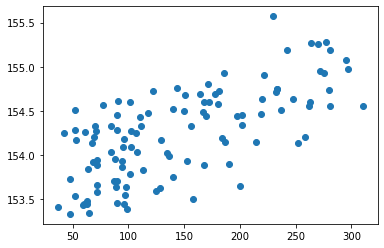

In [87]:
preds = elastic.predict(X_test)

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, preds)

정규화 선형회귀 모델별 가중치(계수) 비교

In [88]:
import pandas as pd
linear = LinearRegression().fit(X_train, y_train)

coefs = np.vstack((linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_))

coefs_df = pd.DataFrame(coefs, columns=data.feature_names,
                       index = ['linear', 'ridge', 'lasso', 'elastic'])
coefs_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
linear,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431
ridge,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543
lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,0.000000
elastic,0.413088,0.000000,3.298991,2.256939,0.339380,0.080784,-1.874661,2.143869,2.947964,1.701981


규제계수 $\alpha$를 튜닝하지 않으면, 아래와 같이 일반 선형회귀보다 규제화된 선형회귀가 더 성능이 않좋다.

In [89]:
linear.score(X_test, y_test)

0.48490866359058016

[Quiz] 당뇨 데이터에 대한 Ridge 모델에 대해 규제계수 $\alpha$를 튜닝해서, Linear Regressor 보다 테스트 데이터에 대해 더 좋은 $R^2$을 갖는 모델을 생성해보자.

In [90]:
alls = {}
alls['a'], alls['R2tr'], alls['R2te'] = [], [], []
best = {}
s = 0
for i in range(-4, 2):
    a = 10**i
    m = Ridge(alpha=a)
    m.fit(X_train, y_train)
    R2tr = m.score(X_test, y_test)
    R2te = m.score(X_test, y_test)
    alls['a'].append(a)
    alls['R2tr'].append(R2tr)
    alls['R2te'].append(R2te)
    if R2te > s:
        s = R2te
        best['a'] = a
        best['R2tr'] = R2tr
        best['R2te'] = R2te
        best['model'] = m
        
best

{'a': 0.1,
 'R2tr': 0.4918283729062707,
 'R2te': 0.4918283729062707,
 'model': Ridge(alpha=0.1)}

In [91]:
import pandas as pd
alldf = pd.DataFrame(alls)
alldf

,a,R2tr,R2te
0,0.0001,0.484972,0.484972
1,0.0010,0.485442,0.485442
2,0.0100,0.487060,0.487060
3,0.1000,0.491828,0.491828
4,1.0000,0.438401,0.438401
5,10.0000,0.156424,0.156424


In [92]:
alls = {}
alls['a'], alls['R2tr'], alls['R2te'] = [], [], []
best = {}
s = 0
for a in [.3, .2, .1, .08, .06]:
    m = Ridge(alpha=a)
    m.fit(X_train, y_train)
    R2tr = m.score(X_test, y_test)
    R2te = m.score(X_test, y_test)
    alls['a'].append(a)
    alls['R2tr'].append(R2tr)
    alls['R2te'].append(R2te)
    if R2te > s:
        s = R2te
        best['a'] = a
        best['R2tr'] = R2tr
        best['R2te'] = R2te
        best['model'] = m
        
best

{'a': 0.1,
 'R2tr': 0.4918283729062707,
 'R2te': 0.4918283729062707,
 'model': Ridge(alpha=0.1)}

[Quiz] Lasso를 튜닝하여 LinearRegressor보다 더 좋은 성능을 갖도록 하자.

In [93]:
alls = {}
alls['a'], alls['R2tr'], alls['R2te'] = [], [], []
best = {}
s = 0
for i in range(-4, 2):
    a = 10**i
    m = Lasso(alpha=a)
    m.fit(X_train, y_train)
    R2tr = m.score(X_test, y_test)
    R2te = m.score(X_test, y_test)
    alls['a'].append(a)
    alls['R2tr'].append(R2tr)
    alls['R2te'].append(R2te)
    if R2te > s:
        s = R2te
        best['a'] = a
        best['R2tr'] = R2tr
        best['R2te'] = R2te
        best['model'] = m
        
best

{'a': 0.1,
 'R2tr': 0.501975882135411,
 'R2te': 0.501975882135411,
 'model': Lasso(alpha=0.1)}

In [94]:
alls = {}
alls['a'], alls['R2tr'], alls['R2te'] = [], [], []
best = {}
s = 0
for a in [.3, .2, .1, .08, .06]:
    m = Lasso(alpha=a)
    m.fit(X_train, y_train)
    R2tr = m.score(X_test, y_test)
    R2te = m.score(X_test, y_test)
    alls['a'].append(a)
    alls['R2tr'].append(R2tr)
    alls['R2te'].append(R2te)
    if R2te > s:
        s = R2te
        best['a'] = a
        best['R2tr'] = R2tr
        best['R2te'] = R2te
        best['model'] = m
        
best

{'a': 0.1,
 'R2tr': 0.501975882135411,
 'R2te': 0.501975882135411,
 'model': Lasso(alpha=0.1)}

In [95]:
best['model'].coef_

array([   0.      , -151.415504,  540.859338,  337.224729,  -85.190306,
         -0.      , -262.90345 ,    0.      ,  418.248224,    9.924307])

[Quiz] 정규화되지 않은 보스턴집값 데이터에서 정규화를 수행한 후, Ridge 회귀를 적용하자.

sklearn에서 제공하는 Scaler는 3가지가 있다:
1. MinMaxScaler: $X' = \cfrac {X - X.min()}{X.max() - X.min()}$
2. StandardScaler: $X' = \cfrac {X - X.mean()}{X.std()}$
3. RobustScaler: $X' = \cfrac {X - X.median()}{X.IQR()}$

In [96]:
from sklearn.preprocessing import RobustScaler

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

scaler = RobustScaler()
scaledXtr = scaler.fit_transform(X_train)
scaledXte = scaler.transform(X_test)

In [97]:
alls = {}
alls['a'], alls['R2tr'], alls['R2te'] = [], [], []
best = {}
s = 0
for i in range(-4, 2):
    a = 10**i
    m = Ridge(alpha=a)
    m.fit(scaledXtr, y_train)
    R2tr = m.score(scaledXtr, y_train)
    R2te = m.score(scaledXte, y_test)
    alls['a'].append(a)
    alls['R2tr'].append(R2tr)
    alls['R2te'].append(R2te)
    if R2te > s:
        s = R2te
        best['a'] = a
        best['R2tr'] = R2tr
        best['R2te'] = R2te
        best['model'] = m
        
best

{'a': 0.0001,
 'R2tr': 0.7480872598608889,
 'R2te': 0.6844265404363803,
 'model': Ridge(alpha=0.0001)}

In [98]:
pd.DataFrame(alls)

,a,R2tr,R2te
0,0.0001,0.748087,0.684427
1,0.0010,0.748087,0.684425
2,0.0100,0.748087,0.684408
3,0.1000,0.748086,0.684239
4,1.0000,0.747969,0.682614
5,10.0000,0.743846,0.670918


[Quiz] Lasso 모델에 대해 위와 같이 a를 튜닝하여 best model을 찾아보자.

In [99]:
alls = {}
alls['a'], alls['R2tr'], alls['R2te'] = [], [], []
best = {}
s = 0
for i in range(-6, 2):
    a = 10**i
    m = Lasso(alpha=a)
    m.fit(scaledXtr, y_train)
    R2tr = m.score(scaledXtr, y_train)
    R2te = m.score(scaledXte, y_test)
    alls['a'].append(a)
    alls['R2tr'].append(R2tr)
    alls['R2te'].append(R2te)
    if R2te > s:
        s = R2te
        best['a'] = a
        best['R2tr'] = R2tr
        best['R2te'] = R2te
        best['model'] = m
        
best

{'a': 1e-06,
 'R2tr': 0.7480872598600883,
 'R2te': 0.684426607999653,
 'model': Lasso(alpha=1e-06)}

In [100]:
pd.DataFrame(alls)

,a,R2tr,R2te
0,0.000001,0.748087,0.684427
1,0.000010,0.748087,0.684426
2,0.000100,0.748087,0.684415
3,0.001000,0.748085,0.684305
4,0.010000,0.747863,0.682931
5,0.100000,0.737338,0.653581
6,1.000000,0.665688,0.579762
7,10.000000,0.047110,0.039901


In [114]:
linearModel = LinearRegression()
linearModel.fit(scaledXtr, y_train)
R2tr = linearModel.score(scaledXtr, y_train)
R2te = linearModel.score(scaledXte, y_test)
R2tr, R2te

(0.748087259862344, 0.6844267283527132)

## 일반적인 regressor 사용방법
SVR, DecisionTreeRegress, RandomForestRegressor, GradientBoostingRegressor ... 이런 모든 회귀용(target이 연속형) 모델의 일반적인 사용법은 이전에 배운 LinearRegressor, Ridge, Lasso 등과 동일하다.

물론 모델의 알고리즘에 따라 설정해야 할 하이퍼파라미터가 달라지는 것은 예외로 한다.

사용법:
1. 모델 instance 생성: m = Ridge()
2. 모델 학습: m.fit(X_train, y_train)
3. 모델 평가: m.score(X_test, y_test)
4. 모델 예측: m.predict(X_test)
5. 회귀 계수: m.coef_

In [115]:
best['model']

KeyError: 'model'

[Quiz] 보스턴 집값 데이터에 대해:
1. train / test를 나누고
2. scaling 없이할 때, knn regressor를 이용하여 최상의 k, R2을 구하시오
3. RobustScaler를 사용할 때, 2번과 같은 작업을 수행하고 결과를 비교하시오.

회귀모델에 대한 평가지표:
1. $R^2 = 1 - \cfrac {SSE}{SST}$
2. MSE: loss이자 평가지표
3. $MAE = \cfrac 1 n \sum |y_i - \hat y_i|$
4. $RMSE = \sqrt{MSE}$

In [116]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

In [117]:
ks = [1, 3, 5, 7, 9, 11]

def kNNtuner(ks, xtr, ytr, xts, yts):
    best = {}
    scores = {}
    scores['k'] = []
    scores['R2'] = []
    bs = 0
    for k in ks:
        m = KNeighborsRegressor(k).fit(xtr, ytr)
        R2 = m.score(xts, yts)
        scores['k'].append(k)
        scores['R2'].append(R2)
        if R2 > bs:
            bs = R2
            best['k'] = k
            best['R2'] = R2
            best['m'] = m
    
    import pandas as pd
    scores = pd.DataFrame(scores)
    
    return best, scores

best, scores = kNNtuner(ks, X_train, y_train, X_test, y_test)

print(best)
scores

{'k': 3, 'R2': 0.6946008632462907, 'm': KNeighborsRegressor(n_neighbors=3)}


,k,R2
0,1,0.481494
1,3,0.694601
2,5,0.639665
3,7,0.570995
4,9,0.514882
5,11,0.514995


거리기반 모델은 반듯이 스케일링을 수행하여, 각 변수들이 동등한 기여도를 갖도록 해주어야 한다.

In [118]:
from sklearn.preprocessing import RobustScaler
mns = RobustScaler().fit(X_train)
X_train_scaled = mns.transform(X_train)
X_test_scaled = mns.transform(X_test)

best, scores = kNNtuner(ks, X_train_scaled, y_train, X_test_scaled, y_test)

print(best)
scores

{'k': 3, 'R2': 0.7293736562378218, 'm': KNeighborsRegressor(n_neighbors=3)}


,k,R2
0,1,0.445515
1,3,0.729374
2,5,0.722990
3,7,0.702703
4,9,0.684632
5,11,0.707657


[Quiz] weights를 distance로 변경할 때, k 값을 튜닝하여 테스트셋에서 가장 좋은 $R^2$을 구해보자.

In [119]:
def kNNtunerWithWeights(ks, xtr, ytr, xts, yts, w='uniform'):
    best = {}
    scores = {}
    scores['k'] = []
    scores['R2'] = []
    bs = 0
    for k in ks:
        m = KNeighborsRegressor(k, weights=w).fit(xtr, ytr)
        R2 = m.score(xts, yts)
        scores['k'].append(k)
        scores['R2'].append(R2)
        if R2 > bs:
            bs = R2
            best['k'] = k
            best['R2'] = R2
            best['m'] = m
    
    import pandas as pd
    scores = pd.DataFrame(scores)
    
    return best, scores

In [120]:
ks = range(3, 15)
best, scores = kNNtunerWithWeights(ks, 
                                   X_train_scaled, y_train, 
                                   X_test_scaled, y_test, 
                                   'distance')

print(best)
scores

{'k': 5, 'R2': 0.7269507925086454, 'm': KNeighborsRegressor(weights='distance')}


,k,R2
0,3,0.722440
1,4,0.722468
2,5,0.726951
3,6,0.720795
4,7,0.714737
5,8,0.702373
6,9,0.702749
7,10,0.722370
8,11,0.722280
9,12,0.719500


### [Excercise] 
insurance 데이터를 이용하여 의료비(의료비 청구액)를 예측하는 모델을 작성해보자.

#### 1. EDA

In [121]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/MLStart')
!pwd

ModuleNotFoundError: No module named 'google'

In [122]:
insu = pd.read_csv('./insurance.csv')
insu.head()

FileNotFoundError: [Errno 2] No such file or directory: './insurance.csv'

In [123]:
insu.info()

NameError: name 'insu' is not defined

In [124]:
insu.describe()

NameError: name 'insu' is not defined

In [125]:
import seaborn as sns
sns.pairplot(insu, kind='reg', hue='sex', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

NameError: name 'insu' is not defined

- bmi가 약 30 이상일 때 charges에 대한 2분포가 형성되는 것으로 보인다.
- age와 charges의 산점도에서 3개의 분포가 나타나는 것이 확인된다.
- children을 범주형으로 보는 것이 유용하다.

In [126]:
sns.pairplot(insu, kind='reg', hue='smoker', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

NameError: name 'insu' is not defined

- 흡연여부에 따라 bmi에 대한 회귀계수가 달라지는 것이 명확하다.
- 특히 bmi 30을 기준으로 흡연자인 경우 2개의 분포를형성하며, 그 분산이 bmi에 따라 더 증가한다.

In [127]:
sns.pairplot(insu, kind='reg', hue='region', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

NameError: name 'insu' is not defined

In [128]:
insu['bmi30'] = np.where(insu.bmi > 30, 1, 0)

NameError: name 'insu' is not defined

In [129]:
sns.displot(insu, x='charges', hue='smoker',
            row='region', col='bmi30', )

NameError: name 'insu' is not defined

#### 2. 기본 base 모델 작성
기본 데이터를 이용한 base 모델을 작성한다.

In [130]:
X = pd.get_dummies(insu.iloc[:, :-2], drop_first=True)
y = insu.charges

X_train, X_test, y_train, y_test = train_test_split(X, y)
base = LinearRegression()
base.fit(X_train, y_train)
baseScore = base.score(X_test, y_test)
baseScore

NameError: name 'insu' is not defined

#### 3. 피처 엔지니어링
1. children은 범주형으로 변환
2. bmi30과 smoker와의 교호작용 존재
3. bmi에 대한 2차항 필요
4. 범주형 변수에 대한 one-hot-encoding

In [131]:
insu.children = insu.children.astype('str')
insu.smoker = np.where(insu.smoker=='yes', 1, 0)
insu.sex = np.where(insu.sex=='male', 1, 0)
insu['bmi2sq'] = insu.bmi ** 2
insu['bmi30smk'] = insu.bmi30 * insu.smoker
insu['bmismk'] = insu.bmi * insu.smoker
insu['bmi2sqsmk'] = insu.bmi2sq * insu.smoker
insu['bmisex'] = insu.bmi * insu.sex

X = pd.get_dummies(insu.drop('charges', axis=1), drop_first=True)
y = insu.charges

X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = LinearRegression()
reg.fit(X_train, y_train)
regScore = reg.score(X_test, y_test)
regScore, baseScore

NameError: name 'insu' is not defined

In [132]:
from sklearn.base import clone
ms, als = [Ridge(max_iter=5000), Lasso(max_iter=5000)], range(-4, 3)
best = {}
best['score'] = regScore
for m in ms:
    for a in als:
        params = {'alpha':10**a}
        m = clone(m)
        m.set_params(**params)
        m.fit(X_train, y_train)
        s = m.score(X_test, y_test)
        if s > best['score']:
            best['score'] = s
            best['model'] = m
best

NameError: name 'regScore' is not defined

In [133]:
best['model'].score(X_test, y_test)

KeyError: 'model'

#### 4. 추가적인 성능 개선
아래와 스케일링이 필요하다.

In [134]:
X_train.mean()

70.02084930992491

In [135]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_ts_scaled = scaler.fit_transform(X_test)

In [136]:
ms, als = [Ridge(max_iter=5000), Lasso(max_iter=5000)], range(-4, 3)
s = best['score']
best = {}
best['score'] = s
for m in ms:
    for a in als:
        params = {'alpha':10**a}
        m = clone(m)
        m.set_params(**params)
        m.fit(X_tr_scaled, y_train)
        s = m.score(X_ts_scaled, y_test)
        if s > best['score']:
            best['score'] = s
            best['model'] = m
best

KeyError: 'score'